<a href="https://colab.research.google.com/github/Nanrtna/Artificial-inteligent-/blob/main/UAS_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Nandita Ratana

NIM : 20220801033

UAS ARTIFICIAL INTELIGEN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Kode di atas mengimpor berbagai pustaka yang diperlukan untuk analisis data dan pemodelan machine learning. Pustaka pandas dan numpy digunakan untuk manipulasi data dan perhitungan numerik. matplotlib dan seaborn digunakan untuk visualisasi data. StandardScaler dan LabelEncoder dari sklearn.preprocessing digunakan untuk normalisasi dan encoding data kategori. KMeans dari sklearn.cluster digunakan untuk algoritma clustering, sementara RandomForestClassifier digunakan untuk klasifikasi berbasis ensemble. train_test_split digunakan untuk membagi dataset menjadi data latih dan data uji, dan accuracy_score digunakan untuk mengevaluasi model klasifikasi berdasarkan akurasi.

In [2]:
df = pd.read_csv("netflix_titles.csv")
df = df.dropna(subset=['rating', 'release_year'])
df['type'] = LabelEncoder().fit_transform(df['type'])
df['rating'] = LabelEncoder().fit_transform(df['rating'])

Kode di atas memuat dataset "netflix_titles.csv" menggunakan pandas dan menyimpan hasilnya ke dalam variabel df. Kemudian, data yang memiliki nilai NaN pada kolom 'rating' dan 'release_year' dihapus menggunakan dropna(). Selanjutnya, kolom 'type' dan 'rating' yang berisi data kategori dikonversi menjadi angka menggunakan LabelEncoder dari sklearn.preprocessing, agar bisa digunakan dalam analisis lebih lanjut atau model machine learning.

In [3]:
features = ['type', 'release_year', 'rating']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Kode di atas memilih kolom 'type', 'release_year', dan 'rating' dari DataFrame df untuk digunakan sebagai fitur dalam variabel X. Kemudian, data pada variabel X dinormalisasi menggunakan StandardScaler dari sklearn.preprocessing, yang mengubah data agar memiliki mean 0 dan standar deviasi 1, disimpan dalam X_scaled. Proses normalisasi ini bertujuan untuk memastikan fitur memiliki skala yang seragam, yang penting dalam banyak algoritma machine learning seperti K-Means.

In [4]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

Kode di atas menjalankan algoritma KMeans dengan jumlah cluster yang ditentukan sebanyak 3 (n_clusters=3) dan menggunakan random_state=42 untuk memastikan hasil yang konsisten setiap kali dijalankan. Fungsi fit_predict() diterapkan pada data yang telah dinormalisasi (X_scaled) untuk melakukan clustering, dan hasil prediksi cluster disimpan dalam kolom baru 'cluster' di DataFrame df. Dengan demikian, setiap baris data akan diberi label sesuai dengan cluster yang teridentifikasi oleh algoritma KMeans.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['cluster'], test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Kode di atas membagi data yang telah dinormalisasi (X_scaled) dan label cluster (df['cluster']) menjadi data latih (X_train, y_train) dan data uji (X_test, y_test) menggunakan train_test_split dengan porsi 80% untuk data latih dan 20% untuk data uji (test_size=0.2). Kemudian, sebuah model RandomForestClassifier diinisialisasi dan dilatih menggunakan data latih dengan metode fit(). Setelah model dilatih, prediksi dilakukan pada data uji menggunakan predict(), dan hasil prediksi disimpan dalam variabel y_pred.

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model dengan Clustering: {accuracy:.4f}')

Akurasi Model dengan Clustering: 0.9994


Kode di atas menghitung akurasi model dengan membandingkan hasil prediksi (y_pred) terhadap nilai sebenarnya (y_test) menggunakan fungsi accuracy_score dari sklearn.metrics. Nilai akurasi yang diperoleh menunjukkan seberapa tepat model dalam memprediksi cluster yang benar pada data uji. Hasil akurasi tersebut kemudian dicetak dengan format yang menunjukkan empat angka desimal menggunakan print(), untuk memberikan gambaran seberapa baik performa model dalam mengklasifikasikan data uji.

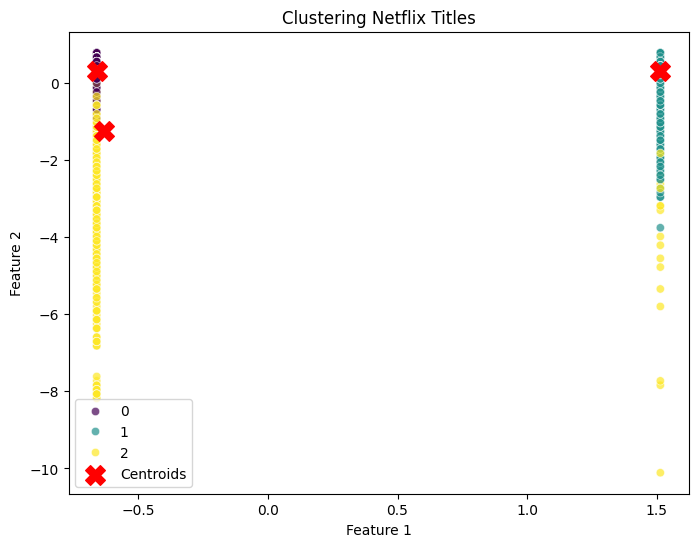

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['cluster'], palette='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("Clustering Netflix Titles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Kode di atas membuat sebuah visualisasi scatter plot menggunakan seaborn untuk menampilkan hasil clustering. Pada plot tersebut, data dari dua fitur pertama yang telah dinormalisasi (dengan menggunakan X_scaled[:, 0] dan X_scaled[:, 1]) diplotkan dengan warna yang sesuai dengan cluster masing-masing (hue=df['cluster']) menggunakan palet warna 'viridis'. Titik-titik yang menunjukkan pusat cluster (centroids) ditandai dengan simbol 'X' berwarna merah dan ukuran lebih besar. Plot ini diberi judul "Clustering Netflix Titles", serta label pada sumbu x dan y untuk menunjukkan dua fitur yang digunakan. Legenda ditambahkan untuk membedakan antara data dan centroid. Akhirnya, fungsi show() digunakan untuk menampilkan plot tersebut.